In [35]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv(r'c:\Users\User\Downloads\CarsData.csv')

print(df)

               model  year  price transmission  mileage fuelType  tax   mpg  \
0                I10  2017   7495       Manual    11630   Petrol  145  60.1   
1               Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
...              ...   ...    ...          ...      ...      ...  ...   ...   
97707         Fiesta  2017  10447    Automatic     8337   Petrol  145  54.3   
97708       3 Series  2014  14995       Manual    25372   Diesel   30  61.4   
97709         Fiesta  2017   8950       Manual    19910   Petrol  125  54.3   
97710          Astra  2017  10700    Automatic    24468   Petrol  125  50.4   
97711    Grandland X  2019  15798       Manual    10586   Diesel  150  48.7   

       engineSize Manufacturer  
0             1.0 

In [36]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [37]:
showdf = df[['Manufacturer', 'model', 'fuelType', 'year']]

print(showdf)

      Manufacturer          model fuelType  year
0           hyundi            I10   Petrol  2017
1       volkswagen           Polo   Petrol  2017
2              BMW       2 Series   Diesel  2019
3            skoda   Yeti Outdoor   Diesel  2017
4             ford         Fiesta   Petrol  2017
...            ...            ...      ...   ...
97707         ford         Fiesta   Petrol  2017
97708          BMW       3 Series   Diesel  2014
97709         ford         Fiesta   Petrol  2017
97710     vauxhall          Astra   Petrol  2017
97711     vauxhall    Grandland X   Diesel  2019

[97712 rows x 4 columns]


In [38]:
test = df.groupby(['year'])
test.describe()

price                                                          \
        count          mean           std      min       25%      50%   
year                                                                    
1970      2.0  17747.000000  10255.876754  10495.0  14121.00  17747.0   
1996      2.0   4497.500000   2117.784810   3000.0   3748.75   4497.5   
1997      4.0   4886.250000   3765.004150    950.0   3200.00   4300.0   
1998      8.0   8257.250000   7734.362856   1990.0   2521.75   4474.5   
1999      6.0   3521.666667   1701.163327   1200.0   2483.75   3972.5   
2000      9.0   3162.555556   3324.004705   1295.0   1550.00   1995.0   
2001     20.0   4149.500000   3403.974589    450.0   1839.75   3970.0   
2002     31.0   3579.290323   3867.051885    495.0   1495.00   2195.0   
2003     34.0   3658.029412   3527.185061    450.0   1491.25   2495.0   
2004     52.0   4523.769231   4814.293415    950.0   1583.75   2691.5   
2005     69.0   3017.420290   2307.067443    675.0   1495.00   2495.0   
2006     86.0   3714.093023   2976.287943    850.0   2256.25   2885.5   
2007    163.0   3706.435583   3672.484877    995.0   2295.00   2895.0   
2008    199.0   4002.924623   3196.181385    694.0   2362.50   3450.0   
2009    277.0   4320.292419   2360.073660   1240.0   2895.00   3750.0   
2010    340.0   5286.147059   3004.047480    900.0   3293.00   4497.0   
2011    432.0   6829.562500   7628.514808   1649.0   4295.00   5499.0   
2012    633.0   7586.617694   3574.675539   2295.0   5200.00   6995.0   
2013   2590.0   8599.331274   3724.711766   1395.0   5995.50   7799.0   
2014   4053.0   9963.713792   4498.236501   2991.0   6799.00   8997.0   
2015   7586.0  11668.836146   5360.186651   3950.0   7982.50  10490.0   
2016  15724.0  13292.296171   5708.756869   3990.0   9110.00  11999.0   
2017  21616.0  14371.352239   6285.640091   3795.0   9995.00  12800.0   
2018  13570.0  16243.035151   8103.450988   5790.0  11000.00  14158.5   
2019  26165.0  23570.006459  11053.436975   5528.0  15950.00  21990.0   
2020   4040.0  29107.626485  12979.633098   8990.0  20980.00  26990.0   
2024      1.0   6495.000000           NaN   6495.0   6495.00   6495.0   

                          mileage                ...     mpg         \
           75%       max    count          mean  ...     75%    max   
year                                             ...                  
1970  21373.00   24999.0      2.0  25678.500000  ...  41.450   42.2   
1996   5246.25    5995.0      2.0  43000.000000  ...  32.400   34.4   
1997   5986.25    9995.0      4.0  84058.250000  ...  35.425   35.8   
1998  12835.00   19990.0      8.0  69236.375000  ...  32.900   41.5   
1999   3995.00    5995.0      6.0  64871.833333  ...  35.300   42.9   
2000   2695.00   11750.0      9.0  72536.111111  ...  38.700   42.9   
2001   4618.75   13000.0     20.0  70396.200000  ...  33.200   53.3   
2002   3890.00   16999.0     31.0  80611.225806  ...  39.250   50.4   
2003   3993.75   14950.0     34.0  86013.735294  ...  40.675   65.7   
2004   4990.00   19950.0     52.0  91267.346154  ...  42.975   53.3   
2005   3485.00   13990.0     69.0  90262.869565  ...  47.100   65.7   
2006   3886.00   17999.0     86.0  88404.116279  ...  47.100   62.8   
2007   3995.00   42992.0    163.0  86650.656442  ...  45.600   61.4   
2008   4642.50   33950.0    199.0  89108.969849  ...  48.700   67.3   
2009   5000.00   21500.0    277.0  81193.111913  ...  53.300   76.3   
2010   6495.00   26990.0    340.0  79279.611765  ...  55.400   76.3   
2011   7836.75  149948.0    432.0  71052.342593  ...  55.400   74.3   
2012   9000.00   44990.0    633.0  64225.377567  ...  60.100  134.5   
2013  10310.75   54850.0   2590.0  52250.501544  ...  62.800  134.5   
2014  12046.00   59990.0   4053.0  46213.418455  ...  64.200  470.8   
2015  14299.00  123456.0   7586.0  41596.416161  ...  66.000  470.8   
2016  16479.25   99950.0  15724.0  32965.080005  ...  66.000  470.8   
2017  17700.00  109495.0  21616.0  24406.1

In [39]:
showdf2 = df.groupby(['Manufacturer', 'model', 'fuelType', 'engineSize', 'year'])['price'].mean()

print(showdf2)

Manufacturer  model  fuelType  engineSize  year
Audi           A1    Diesel    1.6         2011     5362.500000
                                           2012     7202.333333
                                           2013     7781.529412
                                           2014     8949.333333
                                           2015    10241.711864
                                                       ...     
volkswagen     Up    Petrol    1.0         2016     6851.189781
                                           2017     7617.500000
                                           2018     8983.907895
                                           2019     9970.876712
                                           2020    11052.522222
Name: price, Length: 3953, dtype: float64


In [40]:
showdf2 = df.groupby(['Manufacturer', 'model', 'fuelType', 'engineSize', 'year'])['tax'].mean()

print(showdf2)

Manufacturer  model  fuelType  engineSize  year
Audi           A1    Diesel    1.6         2011     10.000000
                                           2012      0.000000
                                           2013      0.000000
                                           2014      0.000000
                                           2015      0.000000
                                                      ...    
volkswagen     Up    Petrol    1.0         2016     19.562044
                                           2017     89.274194
                                           2018    146.513158
                                           2019    145.342466
                                           2020    145.555556
Name: tax, Length: 3953, dtype: float64


In [41]:
print(df['model'].value_counts())
print(df['Manufacturer'].value_counts())
print(df['engineSize'].value_counts())
print(df['year'].value_counts())

model
 Fiesta     6509
 Golf       4797
 Focus      4555
 C Class    3694
 Corsa      3285
            ... 
E Class        1
200            1
 Ranger        1
180            1
220            1
Name: count, Length: 196, dtype: int64
Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64
engineSize
2.0    26886
1.0    17083
1.5    11247
1.4    10893
1.6     8700
1.2     6718
3.0     5395
2.1     3970
1.8     1715
1.3     1307
1.7      907
1.1      558
2.2      466
2.5      454
4.0      355
0.0      268
2.9      170
2.3      145
4.4       79
2.4       72
5.0       52
5.5       44
2.8       41
1.9       27
3.2       27
4.2       26
4.7       24
5.2       23
3.5       20
6.2       13
2.7        8
0.6        7
6.0        2
6.6        2
3.7        2
4.1        2
4.5        1
4.3        1
5.4        1
6.3        1
Name: count, dtype

c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1119: Futur

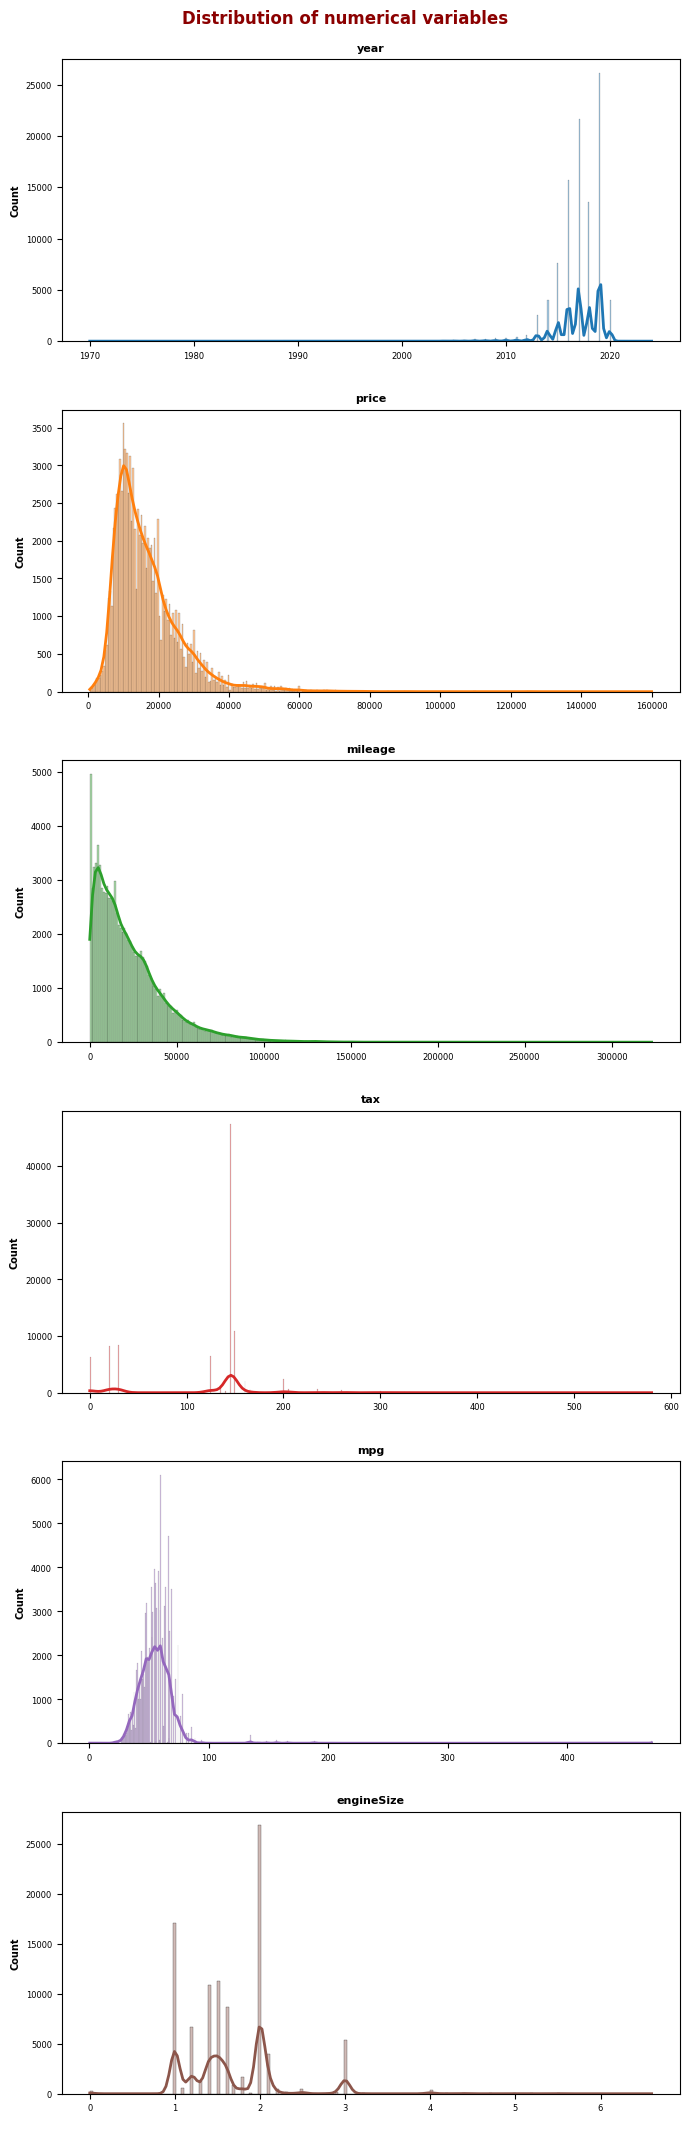

In [42]:
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

fig,axes = plt.subplots(7, 1, figsize = (7, 25))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[6])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


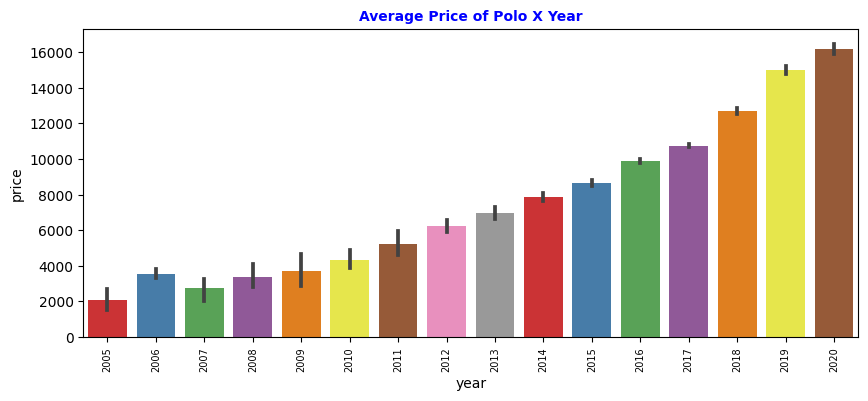

In [43]:
x = df[df['model'] == ' Polo']
x.head()

fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=x, x = 'year', y = 'price', palette="Set1")
ax.set_title('Average Price of Polo X Year', fontsize = 10, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 7)
plt.show()

In [44]:
X = df[['model', 'Manufacturer', 'year', 'engineSize', 'mileage', 'fuelType', 'tax', 'mpg']] #features
Y = df[['price']] #target

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, random_state = 80)

In [46]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

ValueError: could not convert string to float: ' Auris'